In [1]:
# %matplotlib inline%
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
from torchvision import models
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import albumentations
from albumentations import torch as AT
import plotly
from utility_classes import preprocessing

# plt.ion()

train_labels = pd.read_csv("./train_labels.csv")
train_labels.head()

id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0

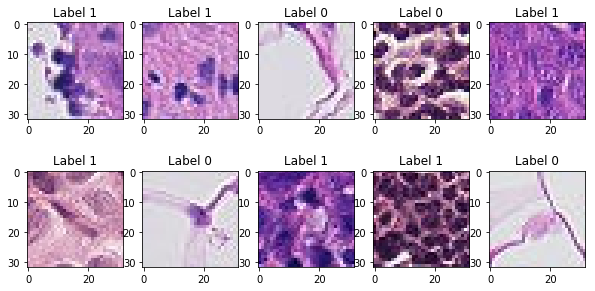

In [2]:
# visualize some images
xform = albumentations.Compose([albumentations.CenterCrop(32, 32)])
num_image_to_show = 10
visualization = train_labels.sample(n=num_image_to_show).reset_index(drop=True)
fig = plt.figure(figsize=(10,5))

for i, row in visualization.iterrows():
    filename = row['id']
    label = row['label']
    image = np.array(Image.open("./train/"+filename+".tif"))
    image = xform(image=image)['image']
    plt.subplot(2, num_image_to_show//2, i+1)
    plt.imshow(image)
    plt.title("Label {}".format(label))

plt.show()

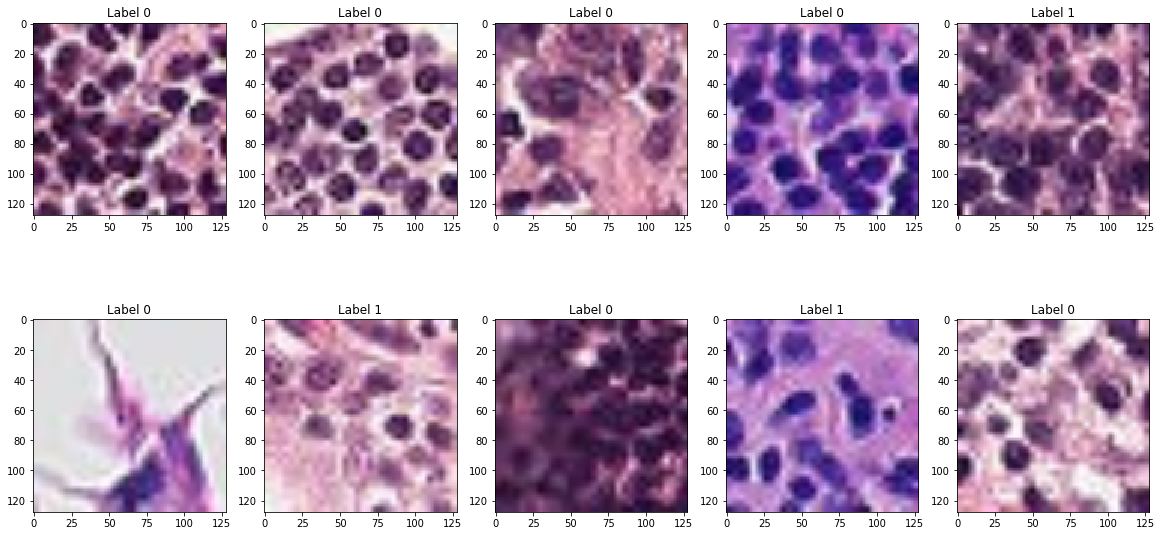

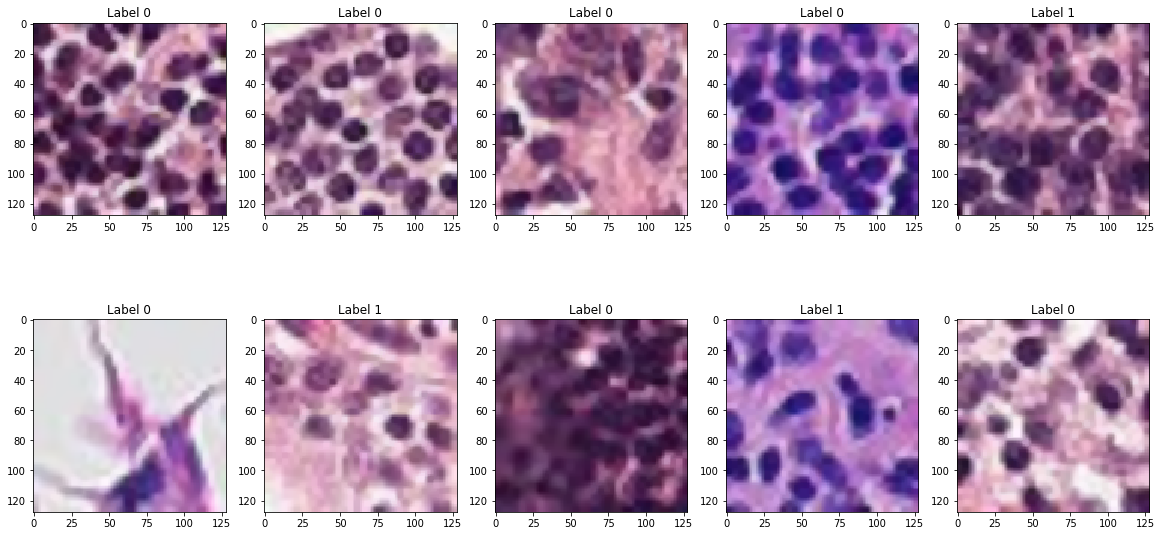

In [2]:
# opening and closing operation
xform = albumentations.Compose([albumentations.CenterCrop(32, 32),
                               albumentations.Resize(128, 128)])
fig_size = (20, 10)
num_image_to_show = 10
visualization = train_labels.sample(n=num_image_to_show).reset_index(drop=True)
fig = plt.figure(figsize=fig_size)

for i, row in visualization.iterrows():
    filename = row['id']
    label = row['label']
    image = np.array(Image.open("./train/"+filename+".tif"))
    image = xform(image=image)['image']
    plt.subplot(2, num_image_to_show//2, i+1)
    plt.imshow(image)
    plt.title("Label {}".format(label))

plt.show()

kernel = np.ones((3,3), np.uint8) 
fig = plt.figure(figsize=fig_size)

for i, row in visualization.iterrows():
    filename = row['id']
    label = row['label']
    image = np.array(Image.open("./train/"+filename+".tif"))
    image = xform(image=image)['image']
    image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    plt.subplot(2, num_image_to_show//2, i+1)
    plt.imshow(image)
    plt.title("Label {}".format(label))
plt.show()

In [20]:
10**(-0.5)*255

80.63808033429368

## Visualizing weights of Resnet:

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid, save_image
import torchvision.models as models
import torch


resnet = models.resnet34(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [54]:
weights = []
for i, layer in enumerate(resnet.modules()):
    layer_type = layer.__class__.__name__
    if layer_type == 'Conv2d':
        data = layer.weight.data.detach().view(-1, 1, layer.kernel_size[0], layer.kernel_size[1])
        data = torch.abs(torch.cat([data, data, data], 1))
        img = make_grid(data, nrow=int(np.sqrt(data.shape[0])), scale_each=True, range=(0,255))
        save_image(img, "./utility_data/Conv2d_{}.jpg".format(i))

In [52]:
# plt.figure(figsize=(10, 20))
# data = resnet.conv1.weight.data.detach().view(-1, 1, resnet.conv1.kernel_size[0], resnet.conv1.kernel_size[1])
# data = torch.cat([data, data, data], 1)
# img = make_grid(data, nrow=int(np.sqrt(data.shape[0])), scale_each=True, range=(0,255))
# plt.imshow(img.permute(1,2,0).numpy())
# plt.show()
resnet.conv1.__class__.__name__

'Conv2d'